### Import

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils.contours as ct

### 讀檔轉灰階

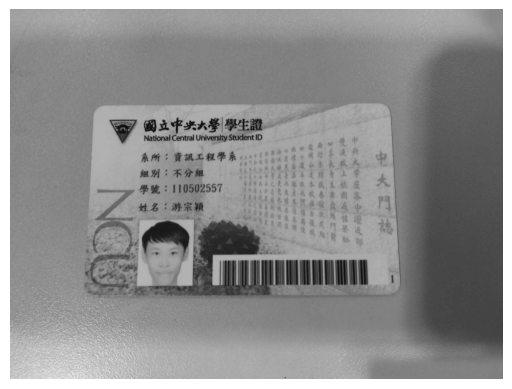

In [81]:
image = cv2.imread("asset/image/student_card_2.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.axis("off")
plt.show()

### 高斯模糊、Opening 去雜訊

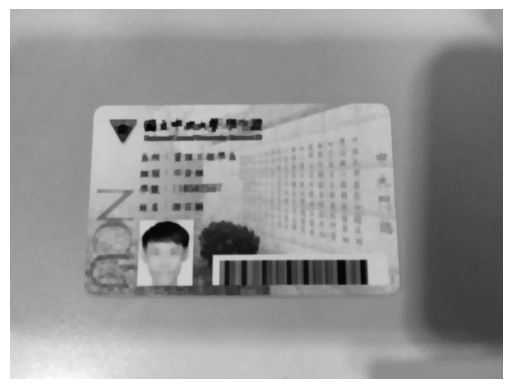

In [82]:
INTENSITY = 11

blur = cv2.GaussianBlur(gray, (INTENSITY, INTENSITY), 0)
kernel = np.ones((INTENSITY, INTENSITY), np.uint8)
opening = cv2.morphologyEx(blur, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)

plt.imshow(opening, cmap="gray")
plt.axis("off")
plt.show()

### Canny

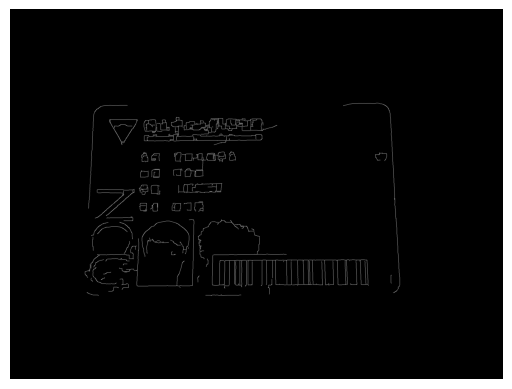

In [83]:
edged = cv2.Canny(closing, 30, 70)
plt.imshow(edged, cmap="gray")
plt.axis("off")
plt.show()

### 尋找輪廓

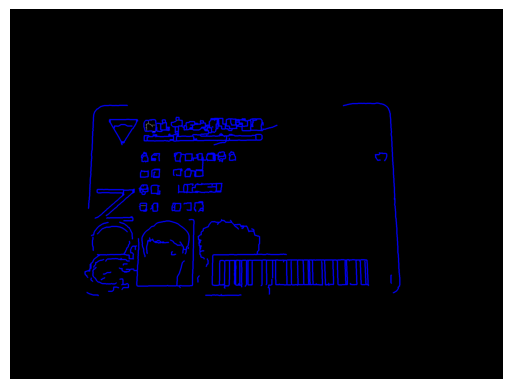

In [84]:
contours, hierarchy = cv2.findContours(edged.copy(),
                                       cv2.RETR_EXTERNAL,
                                       cv2.CHAIN_APPROX_SIMPLE)


contours, _ = ct.sort_contours(contours)
preview = cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB)
cv2.drawContours(preview, contours, -1, (0, 0, 255), 3)
    
plt.imshow(preview)
plt.axis("off")
plt.show()

### 取得頂點

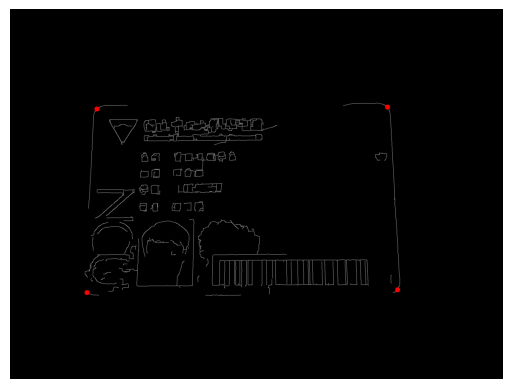

In [85]:
points = np.concatenate(np.concatenate(contours))

tl_br = np.array(list(map(lambda x: x[0] ** 2 + x[1] ** 2, points)))
tr_bl = np.array(list(map(lambda x: (image.shape[1] - x[0]) ** 2 + x[1] ** 2, points)))
vertex_indexs = [
    np.argmin(tl_br),
    np.argmin(tr_bl),
    np.argmax(tl_br),
    np.argmax(tr_bl),
]
vertexs = np.array(list(map(lambda x: points[x], vertex_indexs)), dtype=np.float32)

preview = cv2.cvtColor(edged, cv2.COLOR_GRAY2RGB)
for v in vertexs:
    cv2.circle(preview, v.astype(np.int64), 10, (255, 0, 0), -1)

plt.imshow(preview)
plt.axis("off")
plt.show()

### 裁切與梯形校正

1179.0271413330568 742.1334111869644


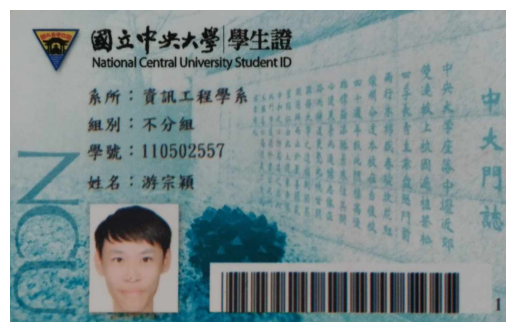

In [86]:
def distance(x: np.ndarray, y: np.ndarray) -> int:
    return np.sqrt([(x[0] - y[0]) ** 2 + (x[1] - y[1]) ** 2])[0]

width = min(distance(vertexs[0], vertexs[1]), distance(vertexs[2], vertexs[3]))
height = min(distance(vertexs[1], vertexs[2]),
             distance(vertexs[3], vertexs[0]))

print(width, height)

dst_vertexs = np.array([
    [0, 0],
    [width - 1, 0],
    [width - 1, height - 1],
    [0, height - 1],
], dtype=np.float32)

perspective_matrix = cv2.getPerspectiveTransform(vertexs, dst_vertexs)
warped = cv2.warpPerspective(image, perspective_matrix, (int(width), int(height)))
reault = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

plt.imshow(reault)
plt.axis("off")
plt.show()